In [90]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



- CRIM - 
(**마을별 1인당 범죄율)**
- ZN - 
(25,000평방피트 이상의 부지에 대해 구획된 주거용 토지의 비율.)
- INDUS - 
(**마을당 비소매 비즈니스 에이커 비율**
- CHAS - 
(찰스강 더비 변수 (강의 경계에 위치 = 1, 아니면 = 0))
- NOX - 
(**일산화질소 농도)**
- RM - 
(**주거당 평균 객실 수)**
- AGE - 
(**1940년 이전에 지어진 소유주 점유의 비율)**
- DIS - 
(**보스턴 고용 센터 5곳까지의 가중 거리)**
- RAD - 
(**방사형 고속도로 접근성 지수)**
- TAX - 
(**$10,000당 전액 재산세율)**
- PTRATIO - 
(타운별 학생/교사 비율)
- B - 
(마을별 흑인 비율입니다)
- LSTAT - %
(모집단의 하위계층의 비율)
- MEDV - 
(**소유주가 거주하는 주택의 중간값 $1000$s)**

### 데이터 로드

In [77]:
df = pd.read_csv('housingdata.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### 결측치 탐지

In [78]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

### 데이터 시각화

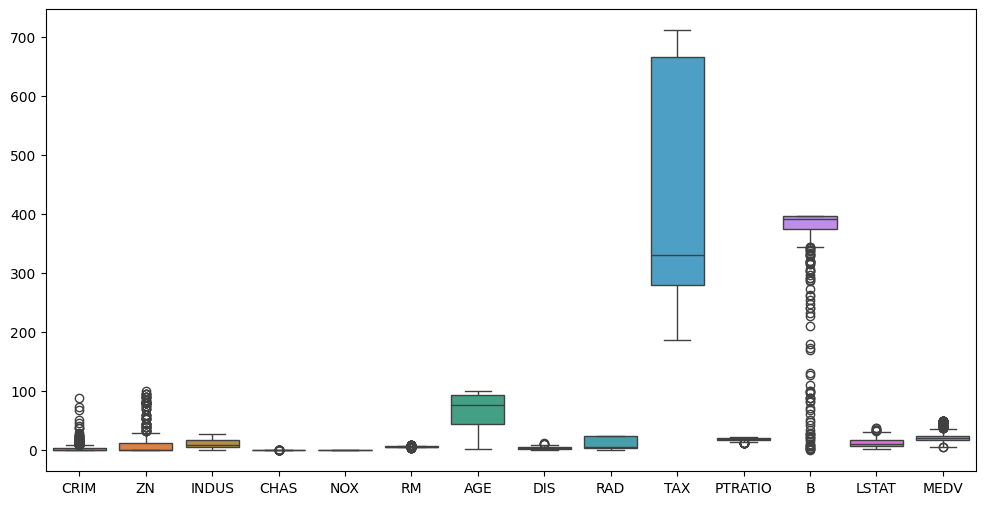

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df.columns.tolist()])
plt.show()

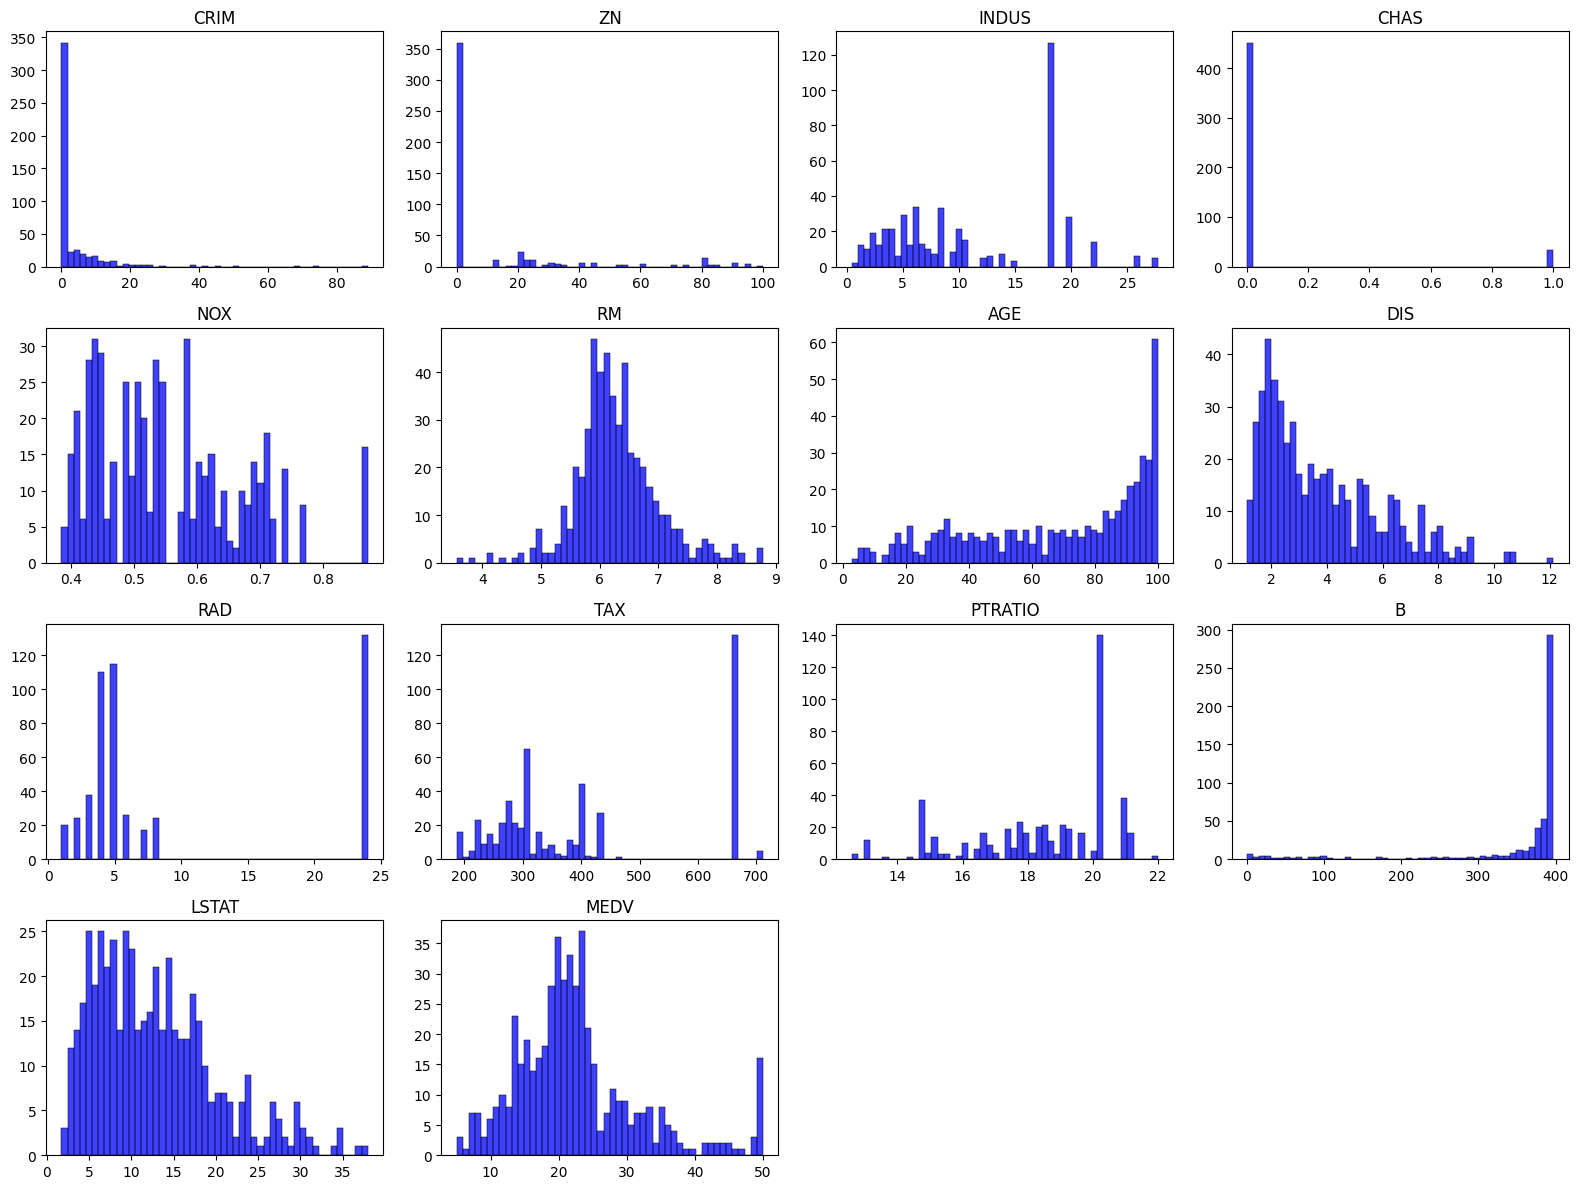

In [80]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(df.columns.tolist(),1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], bins=50, color='blue')
    plt.title(col)
    plt.ylabel('')
    plt.xlabel('')
plt.tight_layout()

### 상관계수 확인 - 히트맵으로 시각화

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

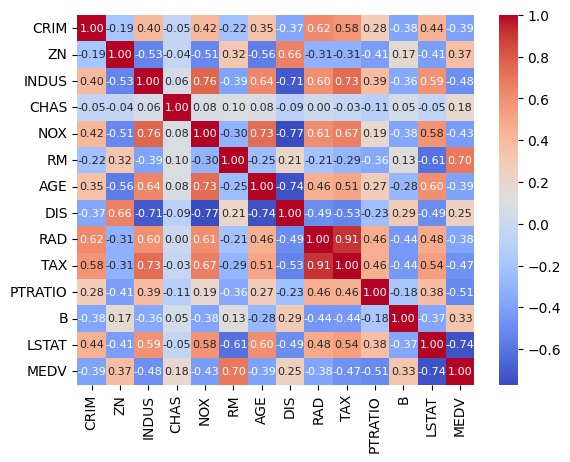

In [81]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.tight_layout

### 결측치 처리

In [82]:
# 0이 압도적으로 많은경우 0 으로 채우고 특정값이 압도적인경우 최빈값으로 채움
df['CRIM'] = df['CRIM'].fillna(0)
df['ZN'] = df['ZN'].fillna(0)
df['INDUS'] = df['INDUS'].fillna(df['INDUS'].mode()[0])
df['CHAS'] = df['CHAS'].fillna(0)
df['AGE'] = df['AGE'].fillna(df['AGE'].mode()[0])



# 아래와 같이 0이 압도적으로 많은 데이터의 경우(CRIM, ZN, CHAS) 최빈값보다 0 으로 채우는 경우가 성능이 더좋게 나와서 0 으로때려박음
# df['CRIM'] = df['CRIM'].fillna(df['CRIM'].mode()[0])
# df['ZN'] = df['ZN'].fillna(df['ZN'].mode()[0])
# df['INDUS'] = df['INDUS'].fillna(df['INDUS'].mode()[0])
# df['CHAS'] = df['CHAS'].fillna(df['CHAS'].mode()[0])
# df['AGE'] = df['AGE'].fillna(df['AGE'].mean())


# df['LSTAT'] = df['LSTAT'].fillna(df['LSTAT'].mean())
# LSTAT 가 히스토그램 보면 왼쪽으로 치우친 분포형태라 로그 변환후 중앙값으로 채운후 역변환 -> 바로 중앙값 채울때 0.65 에서서 0.73 으로 성능향상(선형회귀 기준, 앙상블에선 별효과 없는듯)
df['LSTAT_log'] = np.log1p(df['LSTAT'])
# 결측치 채우기
df['LSTAT_log'] = df['LSTAT_log'].fillna(df['LSTAT_log'].median())
# 역변환
df['LSTAT'] = np.expm1(df['LSTAT_log'])

### 트레인/테스트 분리

In [83]:
X = df.drop(columns=['MEDV'])

X = X.drop(columns=['CHAS'])    # 상관계수가 0.18 이라 너무적어서 빼볼려했지만 0.18이라도 챙겨서 돌리는게 성능이 더좋음 -> 근데 앙상블에선 더 좋아지네 뭐지?
# X = X.drop(columns=['DIS'])    # 추가하는게 성능이 더 좋아서 안뺌
# X = X.drop(columns=['B'])    # 추가하는게 성능이 더 좋아서 안뺌


y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 이상치 처리

In [84]:
# X_train = pd.DataFrame(X_train)

# for i in X_train.columns:
#     Q1 = X_train[i].quantile(0.25)
#     Q3 = X_train[i].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     X_train[i] = X_train[i].clip(lower = lower_bound, upper = upper_bound)

# 컬럼마다 특성에따라 적절한 이상치 처리를해줘야하는데 하나로 다 때려박아버리니까 성능이 더 안나옴

### 스케일링

In [85]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 모델 학습

In [86]:
model_linear = LinearRegression()
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_decision_tree = DecisionTreeRegressor(random_state=42)


model_linear.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_gbm.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)
model_decision_tree.fit(X_train, y_train)


y_pred_linear = model_linear.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_gbm = model_gbm.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_decision_tree = model_decision_tree.predict(X_test)




### 성능평가

In [87]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"mse_linear : {mse_linear}")
print(f"mae_linear : {mae_linear}")
print(f"r2_linear : {r2_linear}")

print('----'* 18)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"mse_rf : {mse_rf}")
print(f"mae_rf : {mae_rf}")
print(f"r2_rf : {r2_rf}")

print('----'* 18)

mse_gbm = mean_squared_error(y_test, y_pred_gbm)
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)
print(f"mse_gbm : {mse_gbm}")
print(f"mae_gbm : {mae_gbm}")
print(f"r2_gbm : {r2_gbm}")

print('----'* 18)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"mse_xgb : {mse_xgb}")
print(f"mae_xgb : {mae_xgb}")
print(f"r2_xgb : {r2_xgb}")

print('----'* 18)

mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)
print(f"mse_decision_tree : {mse_decision_tree}")
print(f"mae_decision_tree : {mae_decision_tree}")
print(f"r2_decision_tree : {r2_decision_tree}")

mse_linear : 18.921682003181736
mae_linear : 2.8443211766704066
r2_linear : 0.7419786462970963
------------------------------------------------------------------------
mse_rf : 8.597890137254899
mae_rf : 2.080588235294117
r2_rf : 0.8827567627534214
------------------------------------------------------------------------
mse_gbm : 7.2806424424645035
mae_gbm : 1.9084695109419871
r2_gbm : 0.9007191211375595
------------------------------------------------------------------------
mse_xgb : 5.866183097808386
mae_xgb : 1.8305152434928742
r2_xgb : 0.9200070847976889
------------------------------------------------------------------------
mse_decision_tree : 26.20127450980392
mae_decision_tree : 3.197058823529412
r2_decision_tree : 0.6427120846537746


### 결과분석 시각화

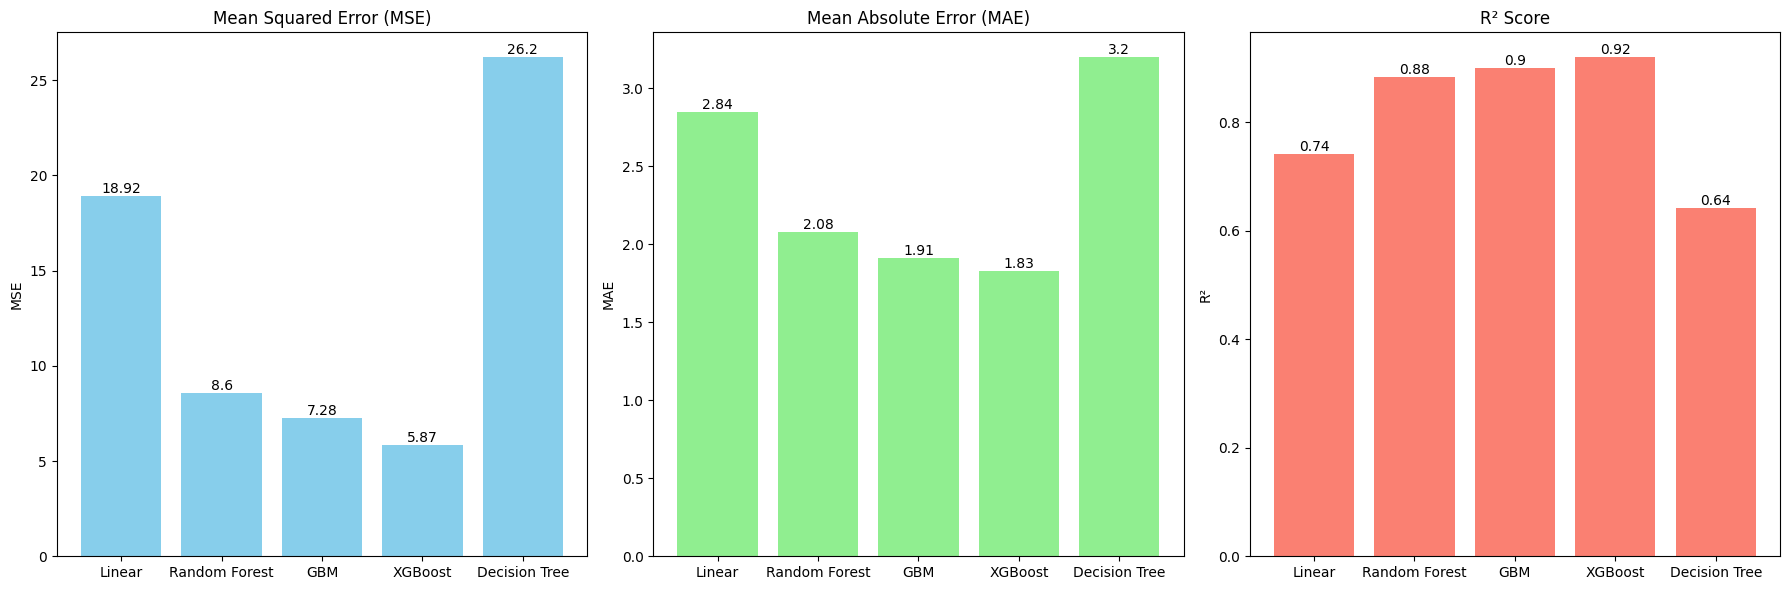

In [88]:
models = ['Linear', 'Random Forest', 'GBM', 'XGBoost', 'Decision Tree']

mse = [mse_linear, mse_rf, mse_gbm, mse_xgb, mse_decision_tree]
mae = [mae_linear, mae_rf, mae_gbm, mae_xgb, mae_decision_tree]
r2 = [r2_linear, r2_rf, r2_gbm, r2_xgb, r2_decision_tree]

bar_width = 0.25  
index = np.arange(len(models))  

def plot_bar_chart(ax, data, labels, title, ylabel, color):
    bars = ax.bar(labels, data, color=color)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    
    # 각 막대에 수치 추가
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom', ha='center')
        
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plot_bar_chart(axes[0], mse, models, 'Mean Squared Error (MSE)', 'MSE', 'skyblue')
plot_bar_chart(axes[1], mae, models, 'Mean Absolute Error (MAE)', 'MAE', 'lightgreen')
plot_bar_chart(axes[2], r2, models, 'R² Score', 'R²', 'salmon')

plt.tight_layout()


### 하이퍼 파라미터 튜닝

In [98]:

from sklearn.model_selection import GridSearchCV


# grid_xgb = XGBRegressor(random_state=42)

# grid_xgb = XGBRegressor(random_state=42, objective="reg:squarederror")



# from xgboost import sklearn as xgb_sklearn

# xgb_sklearn.apply_sklearn_patch()  # Scikit-learn 호환 모드 활성화

grid_xgb = XGBRegressor(random_state=42, objective="reg:squarederror")

# grid_xgb = XGBRegressor(random_state=42, eval_metric='logloss')

param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

grid_search_xgb = GridSearchCV(estimator=grid_xgb,
                               param_grid=param_grid_xgb,
                               scoring='neg_mean_squared_error',
                               cv=5,
                               n_jobs=1,
                               verbose=2)

grid_search_xgb.fit(X_train, y_train)

# best_model_xgb = grid_search_xgb.best_estimator_

# y_pred_xgb_grid = best_model_xgb.predict(X_test)

# 지금 xgb 2.1.3
# 지금 sklearn 1.6.0

# 둘다 최신버전 해보고  사이킷런 1.5.2  xgboost 2.1.3 도 해봄

# scikit-learn==1.2.2 xgboost==1.7.6
# xgboost==1.6.2 scikit-learn==1.1.3



# 1.5.2
# # scikit-learn==1.5.2
# #  1.3.1.

# pip install scikit-learn==1.5.2


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [45]:
result = !pip list
print("\n".join(result))

Package           Version
----------------- -----------
asttokens         3.0.0
colorama          0.4.6
comm              0.2.2
contourpy         1.3.1
cycler            0.12.1
debugpy           1.8.11
decorator         5.1.1
exceptiongroup    1.2.2
executing         2.1.0
fonttools         4.55.3
ipykernel         6.29.5
ipython           8.31.0
jedi              0.19.2
joblib            1.4.2
jupyter_client    8.6.3
jupyter_core      5.7.2
kiwisolver        1.4.8
matplotlib        3.10.0
matplotlib-inline 0.1.7
nest-asyncio      1.6.0
numpy             2.2.1
packaging         24.2
pandas            2.2.3
parso             0.8.4
pillow            11.0.0
pip               24.3.1
platformdirs      4.3.6
prompt_toolkit    3.0.48
psutil            6.1.1
pure_eval         0.2.3
Pygments          2.18.0
pyparsing         3.2.0
python-dateutil   2.9.0.post0
pytz              2024.2
pywin32           308
pyzmq             26.2.0
scikit-learn      1.2.2
scipy             1.14.1
seaborn        